# R 語言的五十道練習

> 資料視覺化

[數據交點](https://www.datainpoint.com/) | 郭耀仁 <yaojenkuo@datainpoint.com>

## 關於資料視覺化

## 為什麼資料需要視覺化？

視覺化在探索性資料分析中佔有舉足輕重的地位，因為對人類來說暸解原始數列資料或者函數是極其困難的。

## 抽象的原始數列資料

In [1]:
v <- rnorm(1000)
print(v[1:10])

 [1] -1.77235202  0.11606663  1.19037167  0.23963170 -1.90994644 -1.18449108
 [7]  0.14373728  1.57955591 -0.06194262 -1.93744960


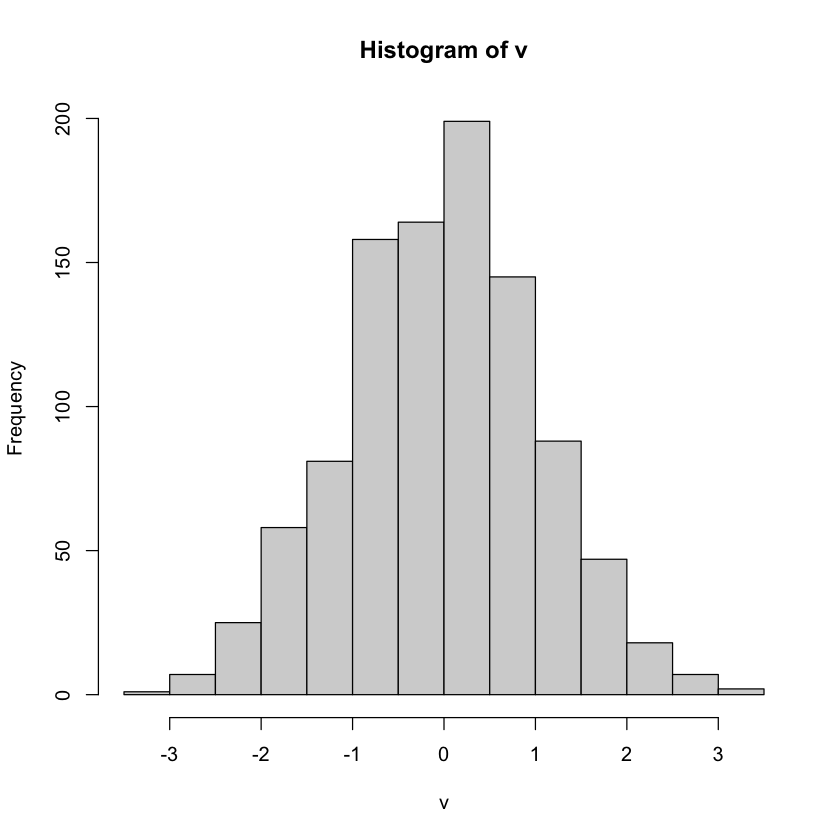

In [2]:
hist(v)

## 抽象的函數

\begin{equation}
f(x) = \frac{1}{1 + e^{-x}}
\end{equation}

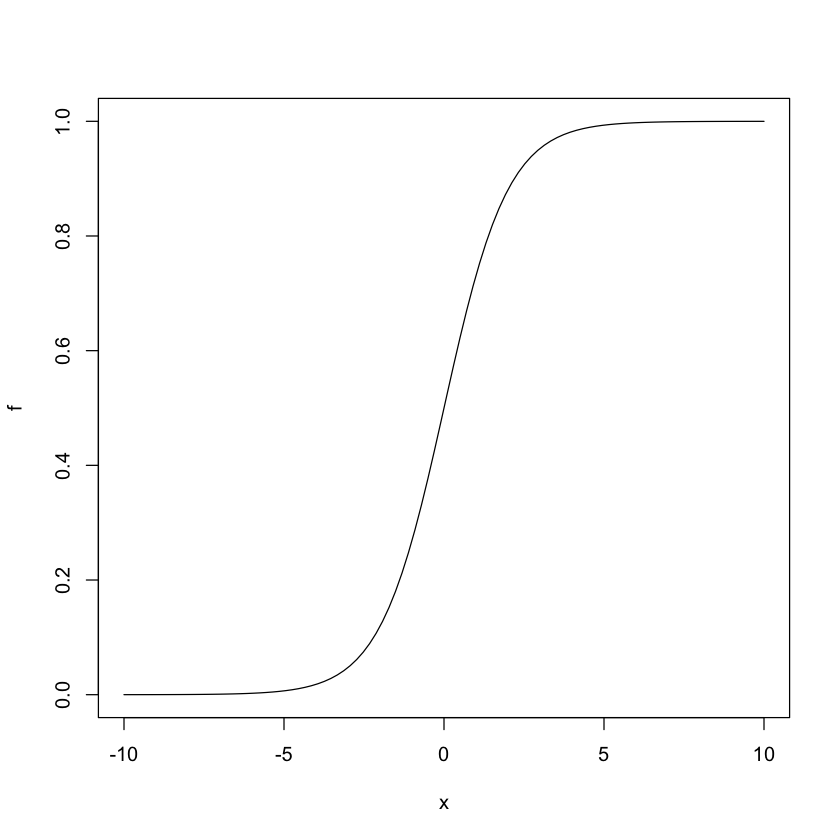

In [3]:
x <- seq(from = -10, to = 10, length.out = 100)
f <- 1/(1 + exp(-x))
plot(x, f, type = "l")

## 資料視覺化經典案例

- [Charles Minard's map of Napoleon's disastrous Russian campaign of 1812](https://en.wikipedia.org/wiki/Charles_Joseph_Minard#/media/File:Minard.png).
- [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://youtu.be/jbkSRLYSojo).

## 好的視覺化要素

- 有資訊價值。
- 簡潔。
- 美觀。

## 範例資料集

## 獲得 `gapminder` 範例資料集

- 安裝 `gapminder` 套件 
- 載入 `gapminder` 套件

## 安裝 `gapminder` 套件

- 透過 RStudio 的 `Packages` 功能頁籤
- 透過 `install.pacakges()` 函數

```r
install.packages("gapminder")
```

## 載入 `gapminder` 套件

- 透過 RStudio 的 `Packages` 功能頁籤
- 透過 `library()` 函數

```r
library("gapminder")
```

## `gapminder` 範例資料集的外觀

In [4]:
library("gapminder")

print(dim(gapminder))

[1] 1704    6


In [5]:
head(gapminder, 3)

country     continent year lifeExp pop      gdpPercap
1 Afghanistan Asia      1952 28.801   8425333 779.4453 
2 Afghanistan Asia      1957 30.332   9240934 820.8530 
3 Afghanistan Asia      1962 31.997  10267083 853.1007

In [6]:
head(gapminder, 3)

country     continent year lifeExp pop      gdpPercap
1 Afghanistan Asia      1952 28.801   8425333 779.4453 
2 Afghanistan Asia      1957 30.332   9240934 820.8530 
3 Afghanistan Asia      1962 31.997  10267083 853.1007

## `gapminder` 範例資料集有幾個國家？幾個洲別？

In [7]:
print(length(unique(gapminder$country)))
print(unique(gapminder$continent))

[1] 142
[1] Asia     Europe   Africa   Americas Oceania 
Levels: Africa Americas Asia Europe Oceania


## `gapminder` 範例資料集有哪些年份？

In [8]:
print(unique(gapminder$year))

 [1] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007


## `ggplot2` 基礎

## 什麼是 `ggplot2`？

ggplot2 以簡潔、彈性和美觀輸出快速擄獲資料科學團隊的芳心；命名之中 gg 指的是 grammer of graphics，套件作者是 Hadley Wickham 與 Winston Chang，核心理念是利用正規而有結構的文法來探索資料。

## 安裝 `ggplot2` 套件

- 透過 RStudio 的 `Packages` 功能頁籤。
- 透過 `install.packages()` 函數。

```r
install.packages("ggplot2")
```

## 載入 `ggplot2` 套件

- 透過 RStudio 的 `Packages` 功能頁籤。
- 透過 `library()` 函數。

```r
library("ggplot2")
```

## 基礎視覺化圖形

- 觀察資料相關性的散佈圖（Scatter Plot）。
- 觀察排序的長條圖（Bar Plot）。
- 觀察資料分佈的直方圖（Histogram）。
- 觀察數值變化趨勢的線圖（Line Plot）。
- 觀察不同類別資料分佈的盒鬚圖（Boxplot）。

## 如何建立一個 `ggplot2` 圖形

- 使用 `ggplot()` 函數做資料映射。
- 使用 `geom_()` 函數調整圖形種類。
- 使用 `+` 連結不同的函數，堆疊圖層。

In [9]:
library("gapminder")               # data
library("ggplot2")                 # plotting
suppressMessages(library("dplyr")) # data manipulations

## 觀察資料相關性的散佈圖（Scatter Plot）

使用 `ggplot(aes(x, y)) + geom_point()`

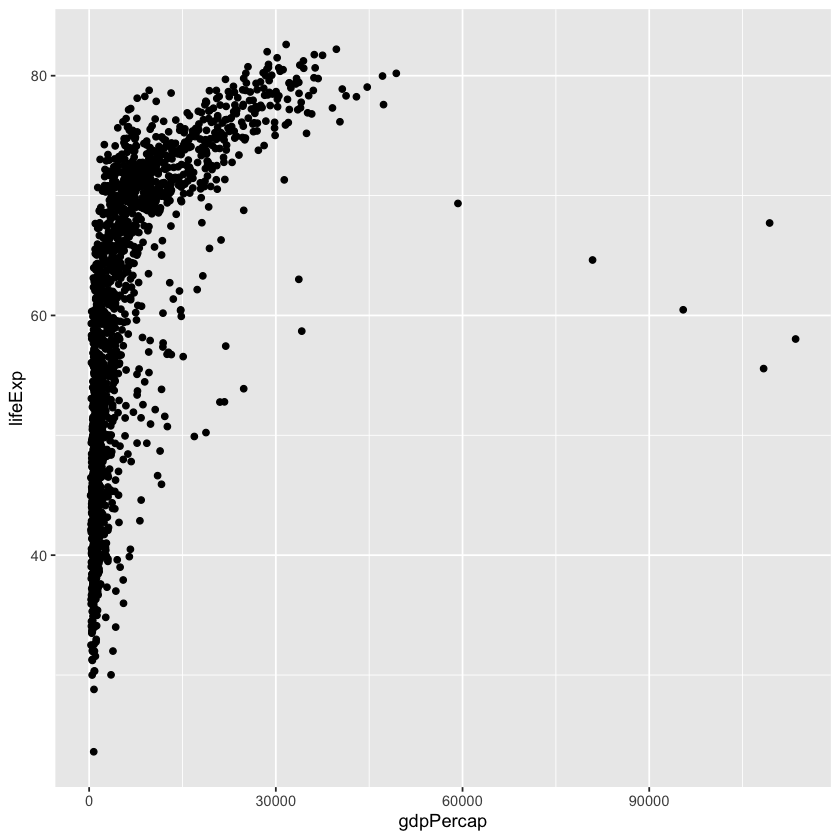

In [10]:
gapminder %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp)) +
    geom_point()

## 觀察排序的長條圖（Bar Plot）：長條高度為觀測值個數

使用 `ggplot(aes(x)) + geom_bar()`

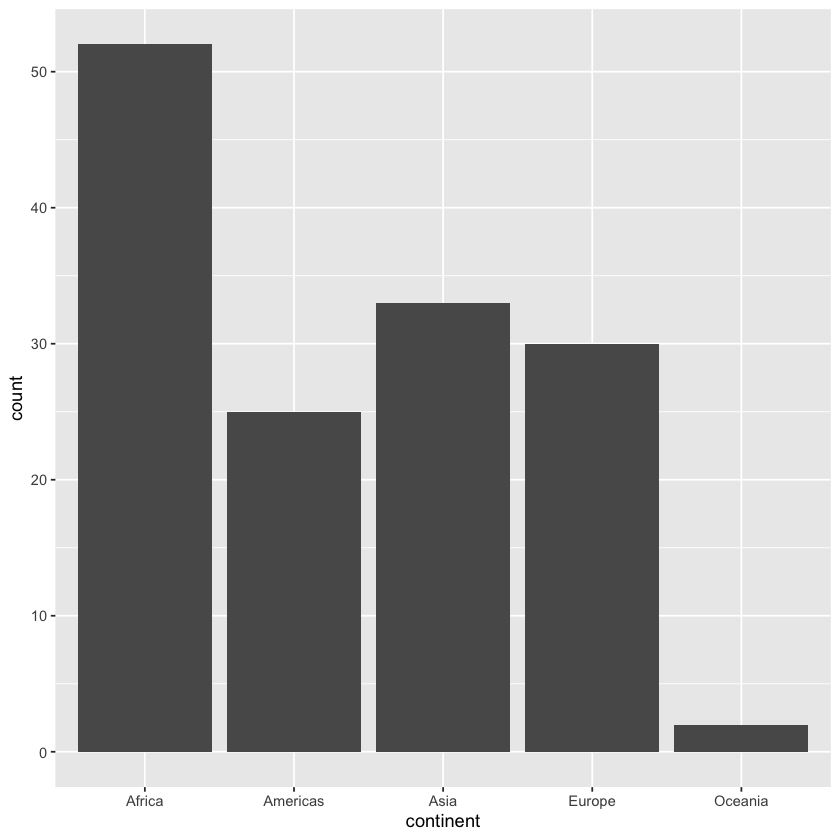

In [11]:
gapminder %>% 
  filter(year == 2007) %>%
  ggplot(aes(x = continent)) +
    geom_bar()

## 觀察排序的長條圖（Bar Plot）：長條高度為摘要數值

使用 `ggplot(aes(x, y)) + geom_bar(stat = "identity")`

`summarise()` ungrouping output (override with `.groups` argument)



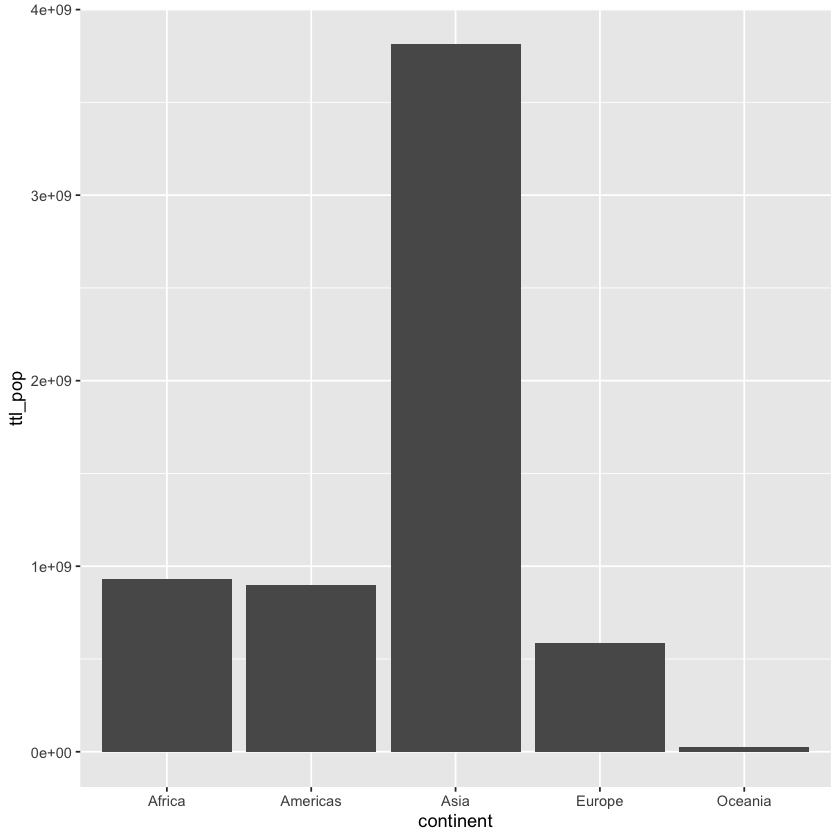

In [12]:
gapminder %>% 
  filter(year == 2007) %>% 
  mutate(pop_numeric = as.numeric(pop)) %>%
  group_by(continent) %>% 
  summarise(ttl_pop = sum(pop_numeric)) %>% 
  ggplot(aes(x = continent, y = ttl_pop)) +
    geom_bar(stat = "identity")

## 觀察資料分佈的直方圖（Histogram）

使用 `ggplot(aes(x)) + geom_histogram()`

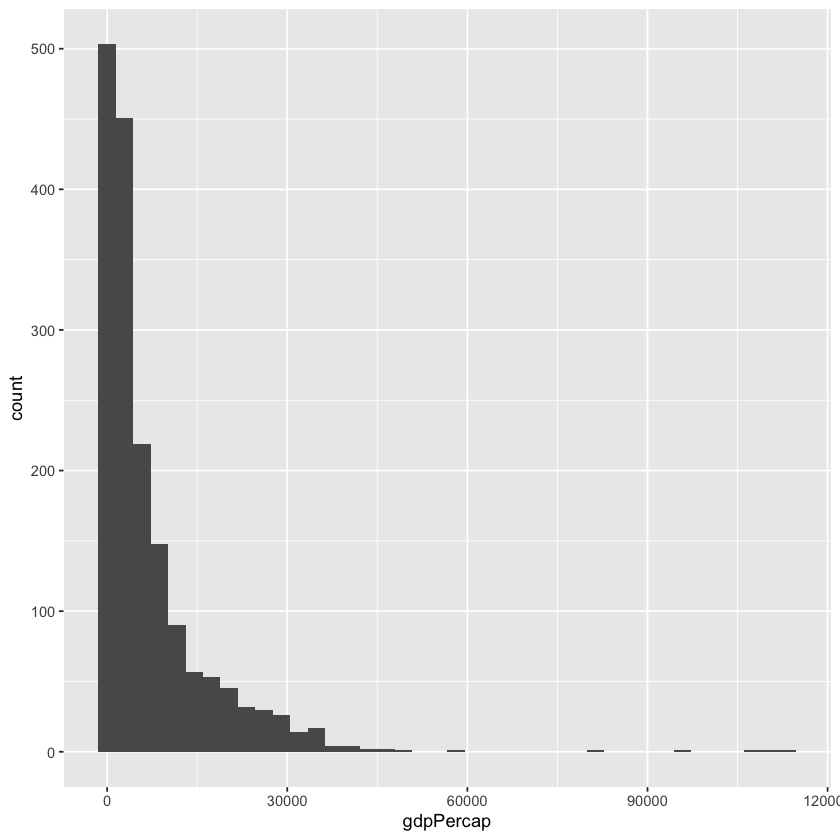

In [13]:
gapminder %>% 
  ggplot(aes(x = gdpPercap)) +
    geom_histogram(bins = 40)

## 觀察數值變化趨勢的線圖（Line Plot）

使用 `ggplot(aes(x, y)) + geom_line()`

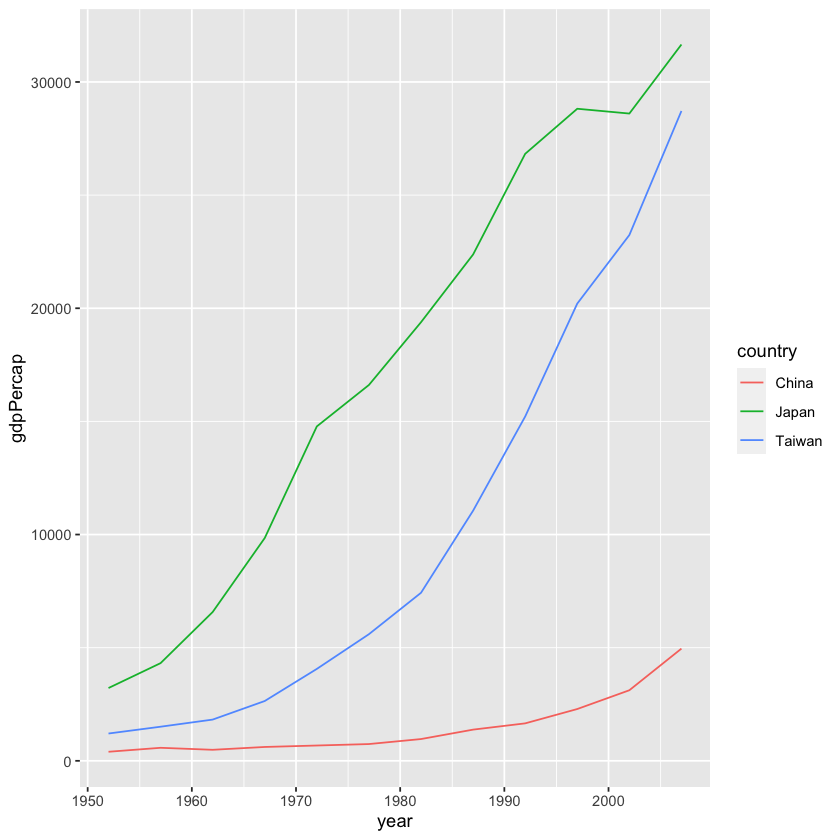

In [14]:
gapminder %>% 
  filter(country %in% c("Taiwan", "Japan", "China")) %>% 
  ggplot(aes(x = year, y = gdpPercap, color = country)) +
    geom_line()

## 觀察不同類別資料散佈的盒鬚圖（Boxplot）

使用 `ggplot(aes(x, y)) + geom_boxplot()`

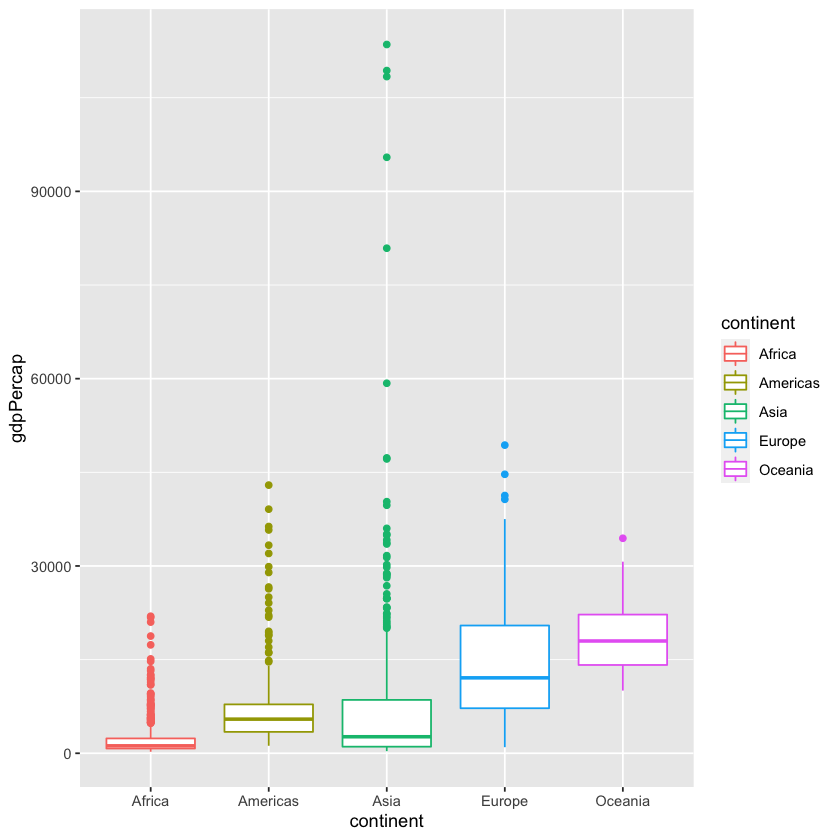

In [15]:
gapminder %>% 
  ggplot(aes(x = continent, y = gdpPercap, color = continent)) +
    geom_boxplot()

## `ggplot2` 技巧

## 常用的 ggplot2 技巧

- 加入圖標題與軸標籤。
- 加入註釋。
- 加入中文字（macOS 使用者會遭遇的問題）。
- 調整座標軸。
- 在一個畫布上繪製多個子圖形。

## 加入圖標題與軸標籤

使用 `ggtitle() + xlab() + ylab()` 函數。

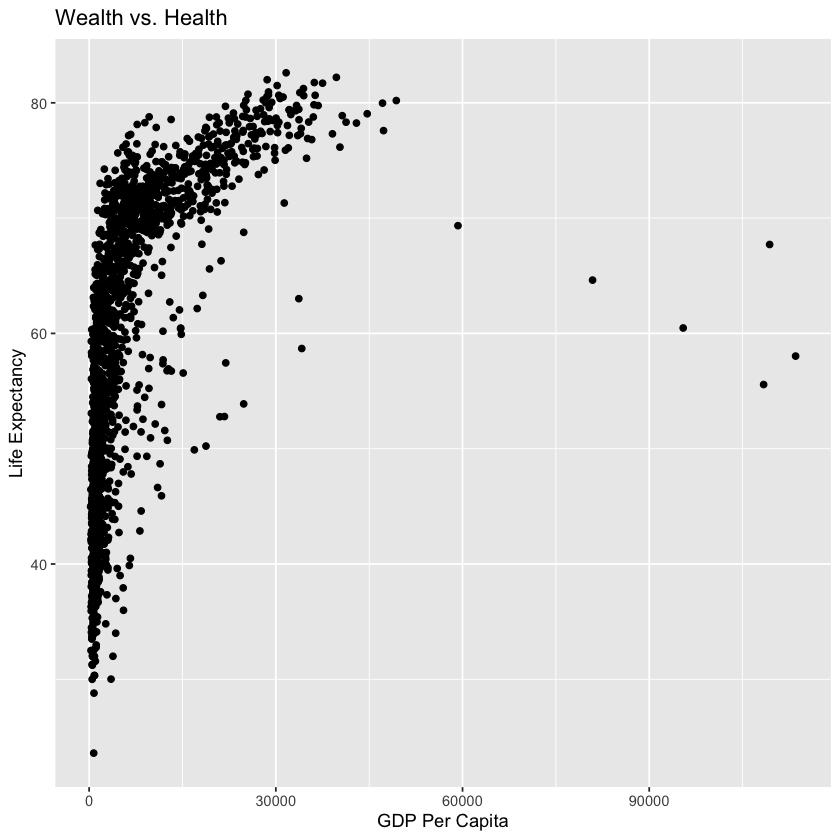

In [16]:
gapminder %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp)) +
    geom_point() +
    ggtitle("Wealth vs. Health") +
    xlab("GDP Per Capita") +
    ylab("Life Expectancy")

## 加入註釋

使用 `geom_text()` 函數。

`summarise()` ungrouping output (override with `.groups` argument)



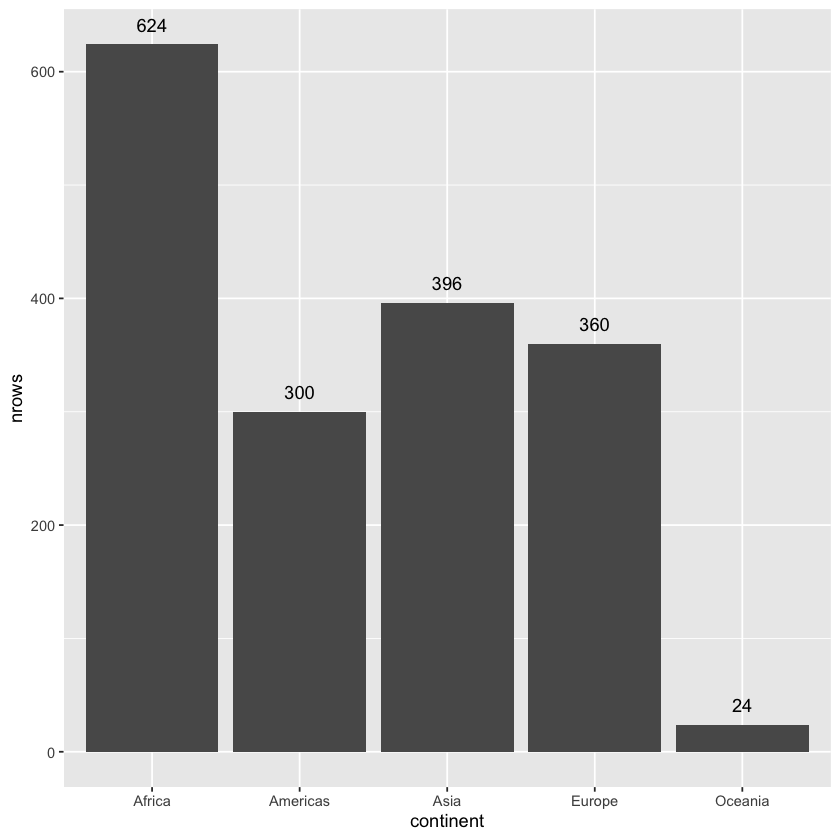

In [17]:
n_obs <- gapminder %>% 
  group_by(continent) %>% 
  summarise(nrows = n())
n_obs %>% 
  ggplot(aes(x = continent, y = nrows)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = nrows, y = nrows), vjust = -1)

## 加入中文字（macOS 使用者會遭遇的問題）

使用 `theme(text = element_text(family = FONTS_SUPPORT_TC))` 函數。

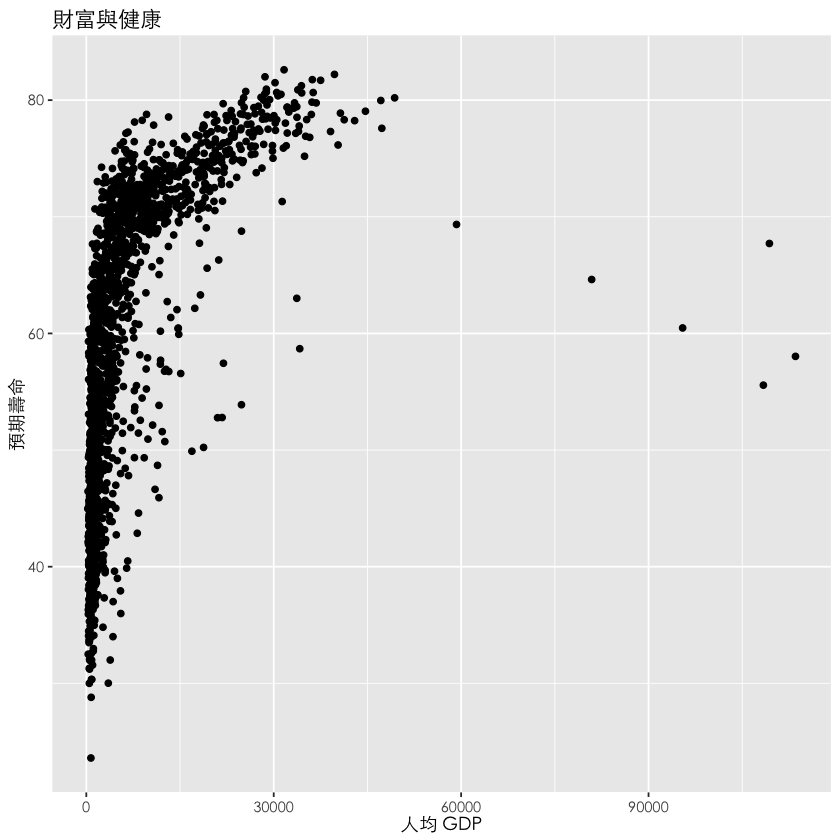

In [18]:
p <- gapminder %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp)) +
    geom_point() +
    ggtitle("財富與健康") +
    xlab("人均 GDP") +
    ylab("預期壽命") +
    theme(text = element_text(family = "Heiti TC Light"))
suppressWarnings(print(p))

## 調整座標軸

使用 `scale_x_continuous()` 與 `scale_y_continuous()` 函數調整座標軸上下界與量尺。

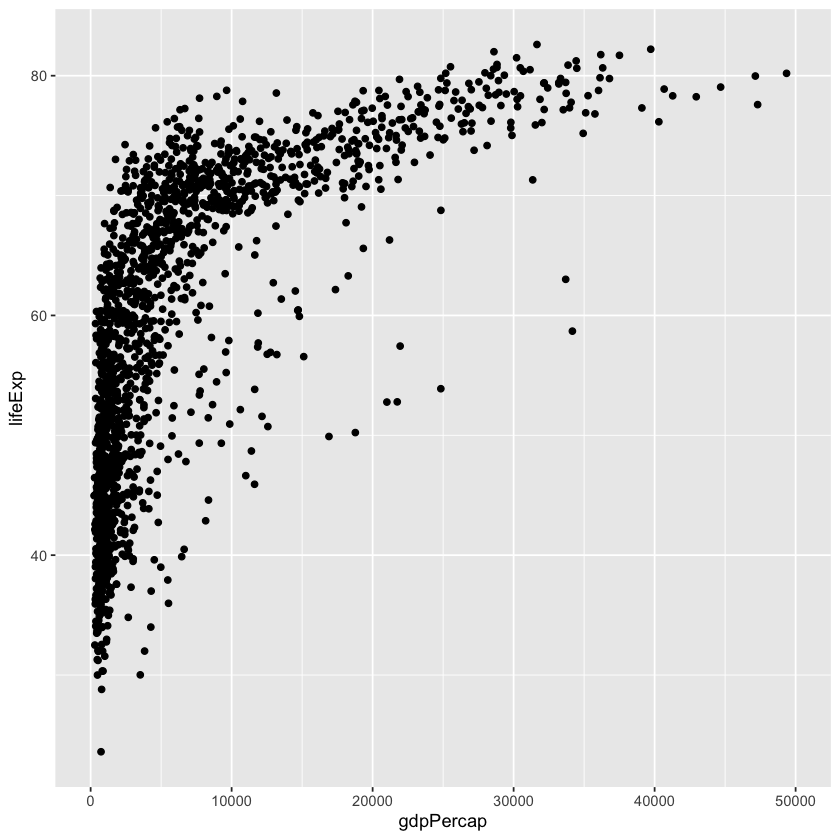

In [19]:
gapminder %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp)) +
    geom_point(na.rm = TRUE) +
    scale_x_continuous(limits = c(0, 50000))

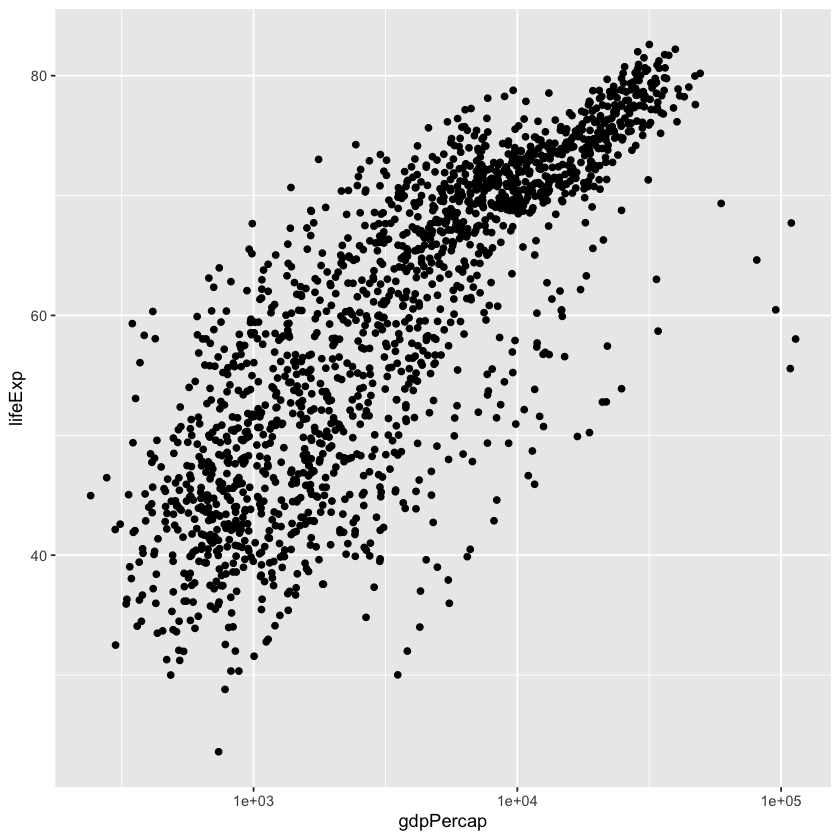

In [20]:
gapminder %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp)) +
    geom_point() +
    scale_x_continuous(trans = "log10")

## 在一個畫布上繪製多個子圖形

使用 `facet_wrap(vars(CATEGORICAL_COLUMN))` 函數。

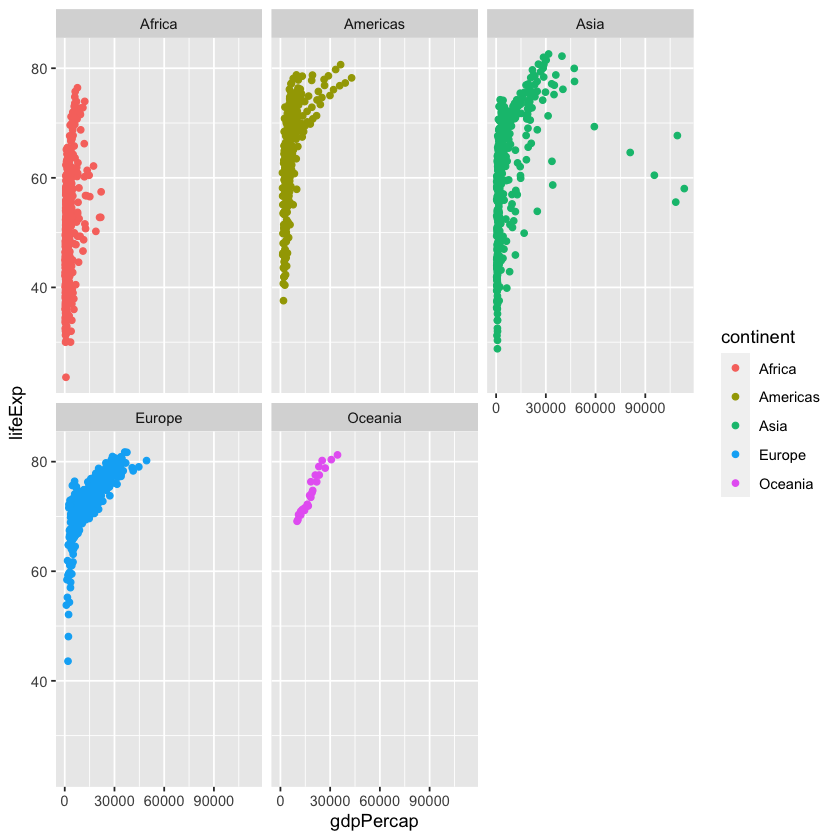

In [21]:
gapminder %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp, color = continent)) +
    geom_point() +
    facet_wrap(vars(continent))

## 使用 `ggplot2` 視覺化真實世界資料

## 範例資料來源

[COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19)

In [22]:
get_daily_report <- function() {
    file_date <- format(Sys.Date() - 2, "%m-%d-%Y")
    csv_url <- paste0("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/",
                      "csse_covid_19_daily_reports/",
                      file_date,
                      ".csv"
                     )
    daily_report <- read.csv(csv_url)
    return(daily_report)
}
daily_report <- get_daily_report()

In [23]:
head(daily_report)

FIPS Admin2 Province_State Country_Region      Last_Update         Lat      
1 NA                         Afghanistan         2021-09-02 04:21:15  33.93911
2 NA                         Albania             2021-09-02 04:21:15  41.15330
3 NA                         Algeria             2021-09-02 04:21:15  28.03390
4 NA                         Andorra             2021-09-02 04:21:15  42.50630
5 NA                         Angola              2021-09-02 04:21:15 -11.20270
6 NA                         Antigua and Barbuda 2021-09-02 04:21:15  17.06080
  Long_     Confirmed Deaths Recovered Active Combined_Key        Incident_Rate
1  67.70995 153260    7123   NA        NA     Afghanistan           393.6977   
2  20.16830 147369    2501   NA        NA     Albania              5120.8910   
3   1.65960 196527    5302   NA        NA     Algeria               448.1695   
4   1.52180  15046     130   NA        NA     Andorra             19473.2414   
5  17.87390  47781    1227   NA        NA     Angola                145.3801   
6 -61.79640   1719      44   NA        NA     Antigua and Barbuda  1755.3713   
  Case_Fatality_Ratio
1 4.647658           
2 1.697100           
3 2.697848           
4 0.864017           
5 2.567966           
6 2.559628

## 以長條圖視覺化前十大確診數國家

In [24]:
confirmed_by_countries <- daily_report %>% 
    group_by(Country_Region) %>% 
    summarise(Confirmed = sum(Confirmed)) %>% 
    arrange(desc(Confirmed))
head(confirmed_by_countries)

`summarise()` ungrouping output (override with `.groups` argument)



Country_Region Confirmed
1 US             39396156 
2 India          32857937 
3 Brazil         20804215 
4 France          6868151 
5 United Kingdom  6856933 
6 Russia          6838652

In [25]:
top_ten_countries <- rev(confirmed_by_countries$Country_Region[1:10])
p <- confirmed_by_countries %>%
    head(10) %>% 
    mutate(Country_Region=factor(Country_Region, levels=top_ten_countries)) %>% 
    ggplot(aes(x = Country_Region, y = Confirmed)) +
    geom_bar(stat = "identity") + 
    coord_flip()

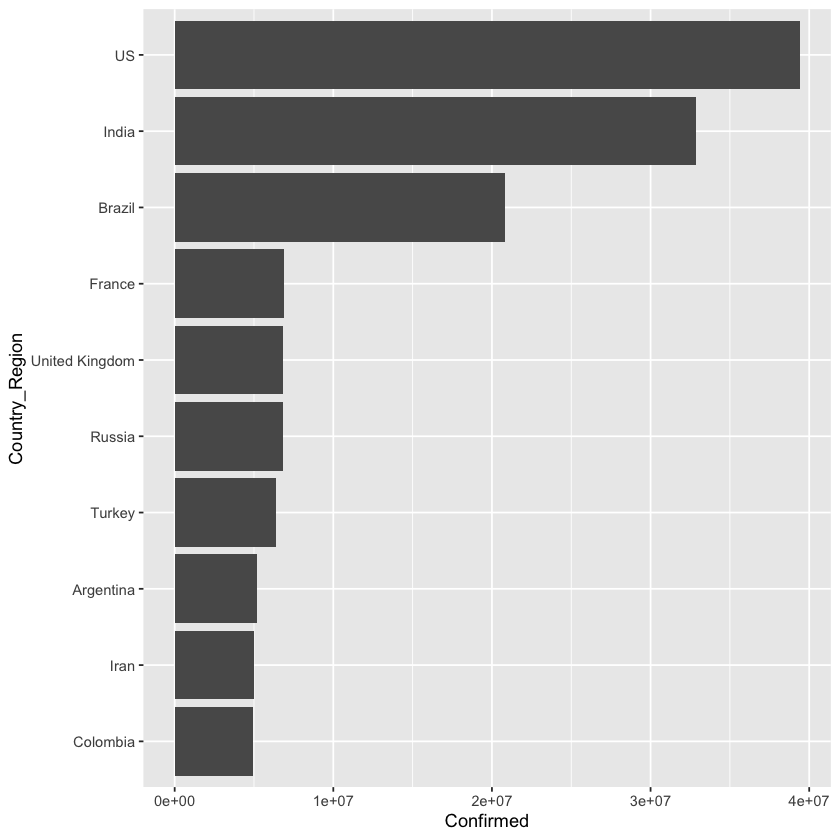

In [26]:
p

In [27]:
top_ten_countries <- rev(confirmed_by_countries$Country_Region[1:10])
top_ten_confirmed <- confirmed_by_countries$Confirmed[1:10]

p <- confirmed_by_countries %>%
    head(10) %>% 
    mutate(Country_Region=factor(Country_Region, levels=top_ten_countries)) %>% 
    ggplot(aes(x = Country_Region, y = Confirmed)) +
    geom_bar(stat = "identity") + 
    geom_text(aes(label = top_ten_confirmed, y = top_ten_confirmed), hjust = -0.1) +
    scale_y_continuous(limits = c(0, 50000000)) +
    coord_flip()

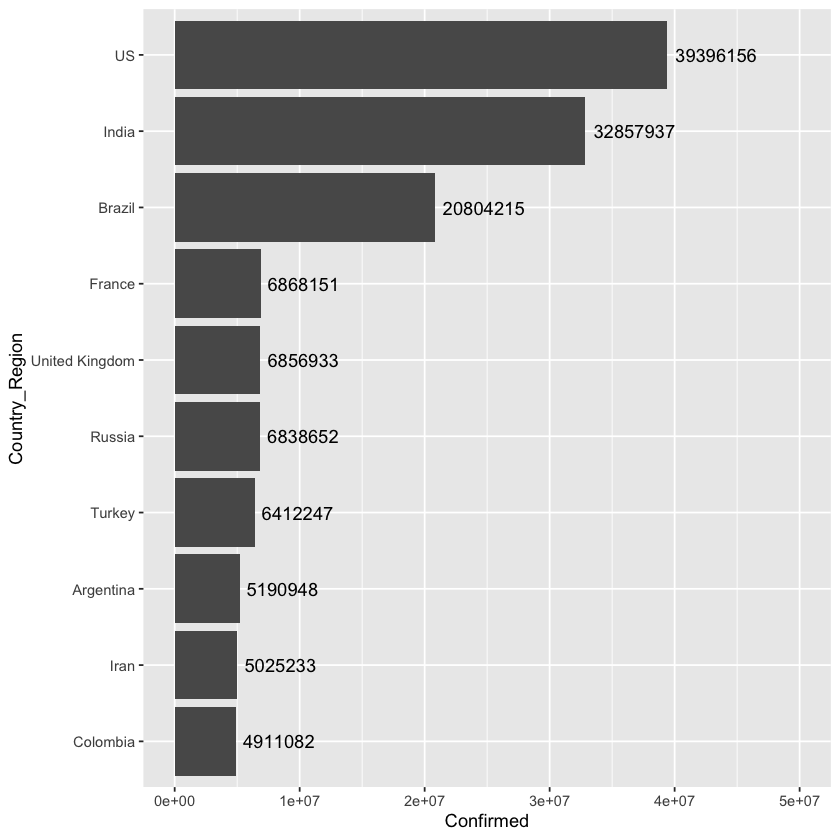

In [28]:
p

## 以線圖視覺化確診數趨勢

In [29]:
library("tidyr")

get_time_series_confirmed <- function() {
    csv_url <- paste0("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/",
                      "csse_covid_19_data/csse_covid_19_time_series/",
                      "time_series_covid19_confirmed_global.csv")
    time_series_confirmed <- read.csv(csv_url)
    cols_to_pivot_longer <- colnames(time_series_confirmed)[5:ncol(time_series_confirmed)]
    time_series_confirmed_long <- time_series_confirmed[, c(2, 5:ncol(time_series_confirmed))] %>% 
        pivot_longer(cols = all_of(cols_to_pivot_longer),
                     names_to = "Date",
                     values_to = "Confirmed"
                    )
    time_series_confirmed_long <- time_series_confirmed_long %>% 
        group_by(Country.Region, Date) %>% 
        summarise(Confirmed = sum(Confirmed))
    time_series_confirmed_long$Date <- time_series_confirmed_long$Date %>% 
        sub(pattern = "X", replacement = "") %>% 
        gsub(pattern = ".", replacement = "-", fixed = TRUE) %>% 
        as.Date("%m-%d-%y")
    return(time_series_confirmed_long)
}

In [30]:
time_series_confirmed <- get_time_series_confirmed()
time_series_confirmed

`summarise()` regrouping output by 'Country.Region' (override with `.groups` argument)



Country.Region Date       Confirmed
1      Afghanistan    2021-01-01 51526    
2      Afghanistan    2021-01-10 53489    
3      Afghanistan    2021-01-11 53538    
4      Afghanistan    2021-01-12 53584    
5      Afghanistan    2021-01-13 53584    
6      Afghanistan    2021-01-14 53775    
7      Afghanistan    2021-01-15 53831    
8      Afghanistan    2021-01-16 53938    
9      Afghanistan    2021-01-17 53984    
10     Afghanistan    2021-01-18 54062    
11     Afghanistan    2021-01-19 54141    
12     Afghanistan    2021-01-02 51526    
13     Afghanistan    2021-01-20 54278    
14     Afghanistan    2021-01-21 54403    
15     Afghanistan    2020-01-22     0    
16     Afghanistan    2021-01-22 54483    
17     Afghanistan    2020-01-23     0    
18     Afghanistan    2021-01-23 54559    
19     Afghanistan    2020-01-24     0    
20     Afghanistan    2021-01-24 54595    
21     Afghanistan    2020-01-25     0    
22     Afghanistan    2021-01-25 54672    
23     Afghanistan    2020-01-26     0    
24     Afghanistan    2021-01-26 54750    
25     Afghanistan    2020-01-27     0    
26     Afghanistan    2021-01-27 54854    
27     Afghanistan    2020-01-28     0    
28     Afghanistan    2021-01-28 54891    
29     Afghanistan    2020-01-29     0    
30     Afghanistan    2021-01-29 54939    
⋮      ⋮              ⋮          ⋮        
115021 Zimbabwe       2020-09-10   7453   
115022 Zimbabwe       2020-09-11   7479   
115023 Zimbabwe       2020-09-12   7508   
115024 Zimbabwe       2020-09-13   7526   
115025 Zimbabwe       2020-09-14   7531   
115026 Zimbabwe       2020-09-15   7576   
115027 Zimbabwe       2020-09-16   7598   
115028 Zimbabwe       2020-09-17   7633   
115029 Zimbabwe       2020-09-18   7647   
115030 Zimbabwe       2020-09-19   7672   
115031 Zimbabwe       2020-09-02   6638   
115032 Zimbabwe       2021-09-02 125118   
115033 Zimbabwe       2020-09-20   7683   
115034 Zimbabwe       2020-09-21   7683   
115035 Zimbabwe       2020-09-22   7711   
115036 Zimbabwe       2020-09-23   7725   
115037 Zimbabwe       2020-09-24   7752   
115038 Zimbabwe       2020-09-25   7787   
115039 Zimbabwe       2020-09-26   7803   
115040 Zimbabwe       2020-09-27   7812   
115041 Zimbabwe       2020-09-28   7816   
115042 Zimbabwe       2020-09-29   7837   
115043 Zimbabwe       2020-09-03   6678   
115044 Zimbabwe       2020-09-30   7838   
115045 Zimbabwe       2020-09-04   6837   
115046 Zimbabwe       2020-09-05   6837   
115047 Zimbabwe       2020-09-06   6837   
115048 Zimbabwe       2020-09-07   7298   
115049 Zimbabwe       2020-09-08   7388   
115050 Zimbabwe       2020-09-09   7429

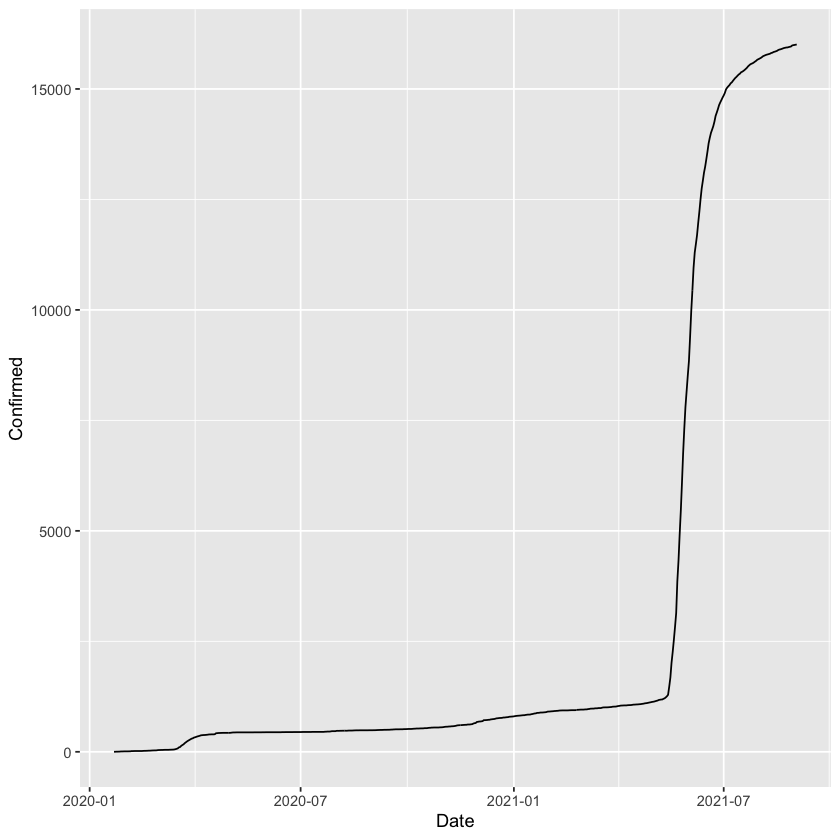

In [31]:
p <- time_series_confirmed %>% 
    filter(Country.Region == "Taiwan*") %>% 
    ggplot(aes(x = Date, y = Confirmed)) + 
    geom_line()
p

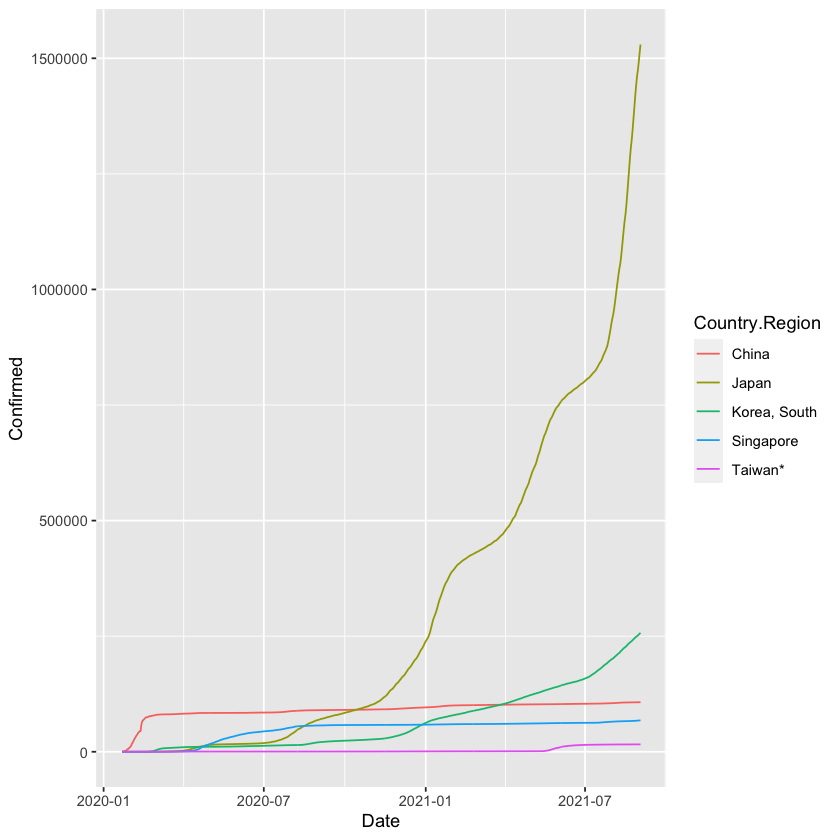

In [32]:
p <- time_series_confirmed %>% 
    filter(Country.Region %in% c("Taiwan*", "China", "Japan", "Korea, South", "Singapore")) %>% 
    ggplot(aes(x = Date, y = Confirmed, colour = Country.Region)) + 
    geom_line()
p

## 以長條圖視覺化每日新增確診數趨勢

In [33]:
time_series_confirmed <- time_series_confirmed %>% 
    filter(Country.Region == "Taiwan*") %>% 
    arrange(Date)
confirmed_lag <- time_series_confirmed$Confirmed %>% 
    lag()
daily_increase <- time_series_confirmed$Confirmed - confirmed_lag

In [34]:
time_series_confirmed$Daily_Increase <- daily_increase
time_series_confirmed

Country.Region Date       Confirmed Daily_Increase
1   Taiwan*        2020-01-22  1        NA            
2   Taiwan*        2020-01-23  1         0            
3   Taiwan*        2020-01-24  3         2            
4   Taiwan*        2020-01-25  3         0            
5   Taiwan*        2020-01-26  4         1            
6   Taiwan*        2020-01-27  5         1            
7   Taiwan*        2020-01-28  8         3            
8   Taiwan*        2020-01-29  8         0            
9   Taiwan*        2020-01-30  9         1            
10  Taiwan*        2020-01-31 10         1            
11  Taiwan*        2020-02-01 10         0            
12  Taiwan*        2020-02-02 10         0            
13  Taiwan*        2020-02-03 10         0            
14  Taiwan*        2020-02-04 11         1            
15  Taiwan*        2020-02-05 11         0            
16  Taiwan*        2020-02-06 16         5            
17  Taiwan*        2020-02-07 16         0            
18  Taiwan*        2020-02-08 17         1            
19  Taiwan*        2020-02-09 18         1            
20  Taiwan*        2020-02-10 18         0            
21  Taiwan*        2020-02-11 18         0            
22  Taiwan*        2020-02-12 18         0            
23  Taiwan*        2020-02-13 18         0            
24  Taiwan*        2020-02-14 18         0            
25  Taiwan*        2020-02-15 18         0            
26  Taiwan*        2020-02-16 20         2            
27  Taiwan*        2020-02-17 22         2            
28  Taiwan*        2020-02-18 22         0            
29  Taiwan*        2020-02-19 23         1            
30  Taiwan*        2020-02-20 24         1            
⋮   ⋮              ⋮          ⋮         ⋮             
561 Taiwan*        2021-08-04 15742     21            
562 Taiwan*        2021-08-05 15753     11            
563 Taiwan*        2021-08-06 15765     12            
564 Taiwan*        2021-08-07 15775     10            
565 Taiwan*        2021-08-08 15782      7            
566 Taiwan*        2021-08-09 15790      8            
567 Taiwan*        2021-08-10 15798      8            
568 Taiwan*        2021-08-11 15814     16            
569 Taiwan*        2021-08-12 15820      6            
570 Taiwan*        2021-08-13 15836     16            
571 Taiwan*        2021-08-14 15843      7            
572 Taiwan*        2021-08-15 15852      9            
573 Taiwan*        2021-08-16 15862     10            
574 Taiwan*        2021-08-17 15880     18            
575 Taiwan*        2021-08-18 15891     11            
576 Taiwan*        2021-08-19 15897      6            
577 Taiwan*        2021-08-20 15906      9            
578 Taiwan*        2021-08-21 15916     10            
579 Taiwan*        2021-08-22 15926     10            
580 Taiwan*        2021-08-23 15932      6            
581 Taiwan*        2021-08-24 15938      6            
582 Taiwan*        2021-08-25 15939      1            
583 Taiwan*        2021-08-26 15947      8            
584 Taiwan*        2021-08-27 15954      7            
585 Taiwan*        2021-08-28 15960      6            
586 Taiwan*        2021-08-29 15983     23            
587 Taiwan*        2021-08-30 15991      8            
588 Taiwan*        2021-08-31 15995      4            
589 Taiwan*        2021-09-01 16001      6            
590 Taiwan*        2021-09-02 16006      5

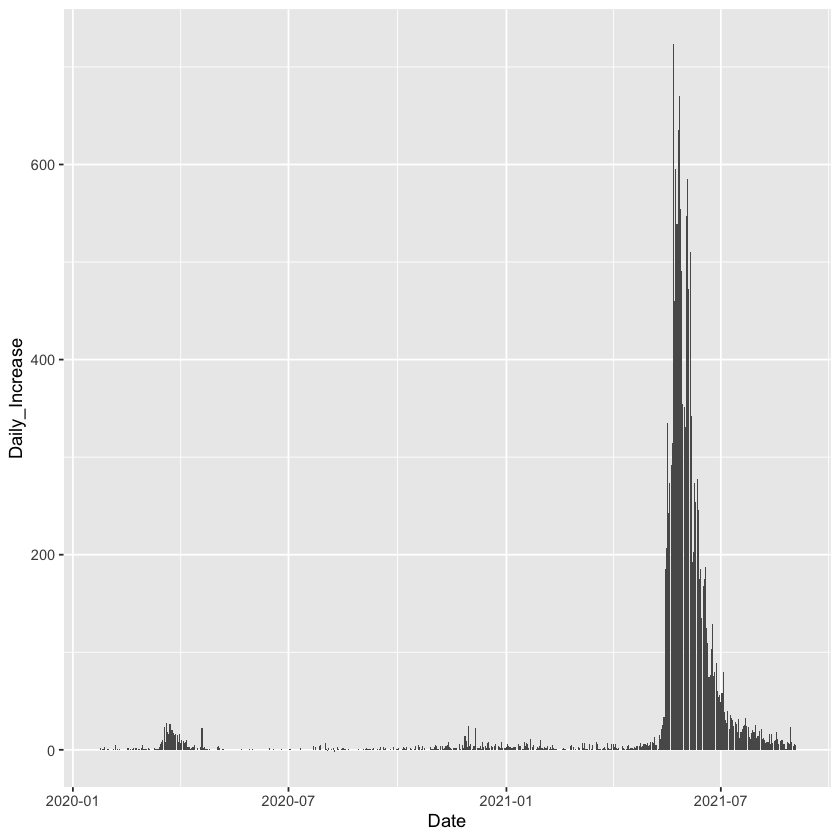

In [35]:
p <- time_series_confirmed %>% 
    filter(!is.na(Daily_Increase)) %>% 
    ggplot(aes(x = Date, y = Daily_Increase)) +
    geom_bar(stat = "identity", na.rm = TRUE)
p

## 使用 `plotly` 複製一個 `gapminder`

## 關於 `plotly` 套件

幫助 R 語言使用者不需要額外去學習 JavaScript 就能夠建立出互動性、具備 D3.js 及 WebGL 特性的圖表。

## 安裝 `plotly` 套件

- 透過 RStudio 的 `Packages` 功能頁籤
- 透過 `install.packages()` 函數

```r
install.packages("plotly")
```

## 載入 `plotly` 套件

- 透過 RStudio 的 `Packages` 功能頁籤
- 透過 `library()` 函數

```r
library("plotly")
```

In [36]:
suppressMessages(library("plotly"))
radius <- sqrt((gapminder$pop)/pi)

p <- gapminder %>%
  plot_ly(
    x = ~gdpPercap, 
    y = ~lifeExp, 
    size = ~pop, 
    color = ~continent, 
    frame = ~year, 
    text = ~country, 
    fill = ~'',
    hoverinfo = "text",
    type = 'scatter',
    mode = 'markers',
    sizes = c(min(radius), max(radius))
  ) %>%
  layout(
    xaxis = list(
      type = "log"
    )
  )

In [37]:
p

HTML widgets cannot be represented in plain text (need html)

## 重點統整

- 基礎視覺化圖形以及依探索性分析目的有：
    - 觀察資料相關性的散佈圖（Scatter Plot）。
    - 觀察排序的長條圖（Bar Plot）。
    - 觀察資料分佈的直方圖（Histogram）。
    - 觀察數值變化趨勢的線圖（Line Plot）。
    - 觀察不同類別資料分佈的盒鬚圖（Boxplot）。

## 重點統整（續）

- 建立一個 ggplot2 視覺化有三個主要步驟：
    - 使用 `ggplot()` 函數做資料映射。
    - 使用 `geom_()` 函數調整圖形種類。
    - 使用 `+` 連結不同的函數，堆疊圖層。

## 重點統整（續）

- R 語言使用者若想要建立出互動性、具備 D3.js 及 WebGL 特性的圖表，可以使用 `plotly` 套件。